**DETECTION**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
                "hours_per_week", "native_country", "income"]
data = pd.read_csv(url, header=None, names=column_names, na_values=' ?')

In [3]:
print(data.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
# Drop rows with missing values to clean the dataset
data.dropna(inplace=True)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
# Calculate and display the normalized (proportional) distribution of 'race' and 'sex' in the dataset
race_distribution = data['race'].value_counts(normalize=True)
sex_distribution = data['sex'].value_counts(normalize=True)
print("\nRace distribution in the dataset (normalized):")
print(race_distribution)


Race distribution in the dataset (normalized):
race
 White                 0.859790
 Black                 0.093396
 Asian-Pac-Islander    0.029673
 Amer-Indian-Eskimo    0.009482
 Other                 0.007659
Name: proportion, dtype: float64


In [8]:
print("\nSex distribution in the dataset (normalized):")
print(sex_distribution)


Sex distribution in the dataset (normalized):
sex
 Male      0.675685
 Female    0.324315
Name: proportion, dtype: float64


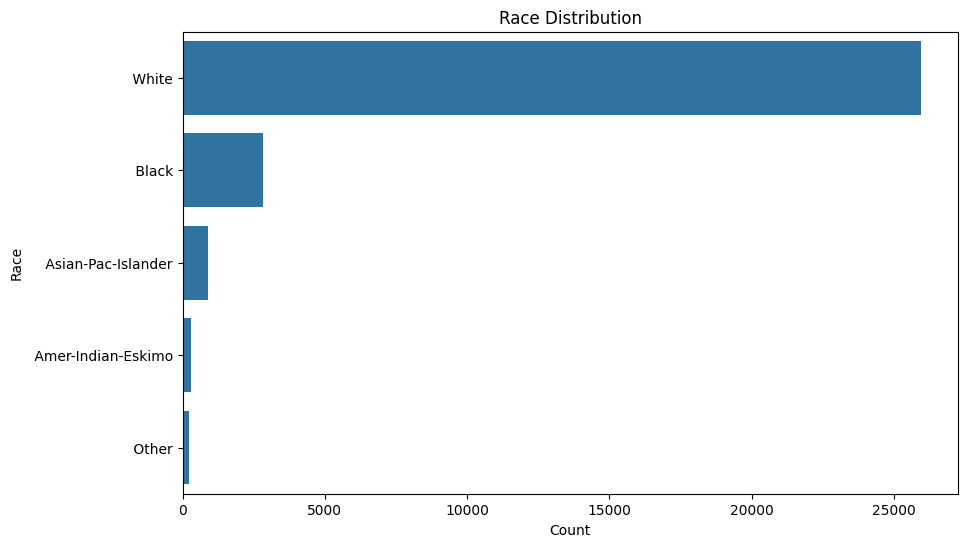

In [9]:
# Visualize the distribution of 'race' in the dataset using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=data)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

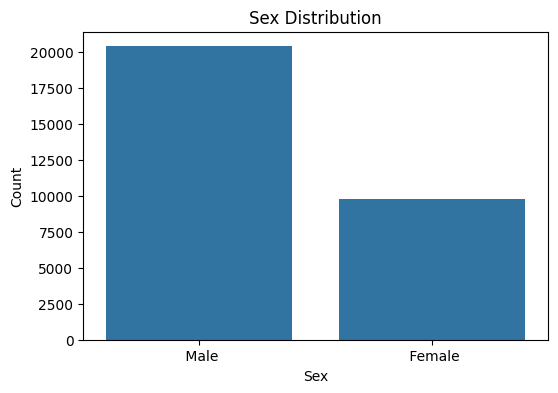

In [10]:
# Visualize the distribution of 'sex' in the dataset using a count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [11]:
# Expected distribution based on U.S. Census data
expected_race_distribution = [0.601, 0.122, 0.056, 0.009, 0.212]  # White, Black, Asian (incl. Amer-Pac-Islander), Amer-Indian-Eskimo, Other races
expected_sex_distribution = [0.492, 0.508]  # Male, Female

In [12]:
# Create contingency tables for chi-square tests
# Observed counts of race categories in the dataset
race_observed = data['race'].value_counts().values
# Expected counts of race categories based on expected distribution
race_expected = [val * len(data) for val in expected_race_distribution]

In [13]:
# Perform chi-square test to compare observed and expected race distributions
chi2_race, p_race, dof_race, ex_race = chi2_contingency([race_observed, race_expected])
print("\nChi-Square Test for Race Distribution:")
print(f"Chi2 statistic: {chi2_race:.2f}")
print(f"P-value: {p_race:.4f}")
print(f"Degrees of freedom: {dof_race}")


Chi-Square Test for Race Distribution:
Chi2 statistic: 7475.36
P-value: 0.0000
Degrees of freedom: 4


In [14]:
# Observed counts of sex categories in the dataset
sex_observed = data['sex'].value_counts().values
# Expected counts of sex categories based on expected distribution
sex_expected = [val * len(data) for val in expected_sex_distribution]

In [15]:
# Perform chi-square test to compare observed and expected sex distributions
chi2_sex, p_sex, dof_sex, ex_sex = chi2_contingency([sex_observed, sex_expected])
print("\nChi-Square Test for Sex Distribution:")
print(f"Chi2 statistic: {chi2_sex:.2f}")
print(f"P-value: {p_sex:.4f}")
print(f"Degrees of freedom: {dof_sex}")


Chi-Square Test for Sex Distribution:
Chi2 statistic: 2093.46
P-value: 0.0000
Degrees of freedom: 1


In [16]:
# Interpretation of p-values
alpha = 0.05  # Significance level
if p_race < alpha:
    print("\nThe race distribution is significantly different from the expected distribution.")
else:
    print("\nThe race distribution is not significantly different from the expected distribution.")

if p_sex < alpha:
    print("The sex distribution is significantly different from the expected distribution.")
else:
    print("The sex distribution is not significantly different from the expected distribution.")


The race distribution is significantly different from the expected distribution.
The sex distribution is significantly different from the expected distribution.


**MITIGATION (HYBRID)**

In [18]:
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.1 MB/s eta 0:00:00


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from fairlearn.metrics import demographic_parity_difference
import matplotlib.pyplot as plt

In [20]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [22]:
# Feature matrix and target vector
X = data.drop("income_ >50K", axis=1)
y = data["income_ >50K"]

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
def create_predictive_model(input_dim):
    # Predictive model
    predictor = models.Sequential([
        layers.Dense(32, activation='relu', input_dim=input_dim),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile model
    predictor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return predictor

def create_adversarial_model(input_dim):
    # Adversarial model
    adversary = models.Sequential([
        layers.Dense(32, activation='relu', input_dim=input_dim),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile model
    adversary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return adversary

In [35]:
input_dim = X_train.shape[1]
predictor = create_predictive_model(input_dim)
adversaries = {feature: create_adversarial_model(input_dim) for feature in ['sex_ Male', 'race_ White', 'race_ Black', 'race_ Asian-Pac-Islander', 'race_ Other']}

# Train the predictive model
predictor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
755/755 [==============================] - 3s 2ms/step - loss: 0.3799 - accuracy: 0.8177
Epoch 2/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8481
Epoch 3/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.8513
Epoch 4/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.8525
Epoch 5/50
755/755 [==============================] - 2s 3ms/step - loss: 0.3089 - accuracy: 0.8538
Epoch 6/50
755/755 [==============================] - 2s 3ms/step - loss: 0.3055 - accuracy: 0.8565
Epoch 7/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3041 - accuracy: 0.8588
Epoch 8/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.8600
Epoch 9/50
755/755 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.8586
Epoch 10/50
755/755 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.8625

In [36]:
# Train the adversarial models
for feature in adversaries:
    adversaries[feature].fit(X_train, X_train[:, list(data.columns).index(feature)], epochs=50, batch_size=32, verbose=1)

Epoch 1/50
755/755 [==============================] - 2s 2ms/step - loss: -63.2815 - accuracy: 0.0000e+00
Epoch 2/50
755/755 [==============================] - 1s 2ms/step - loss: -1318.1305 - accuracy: 0.0000e+00
Epoch 3/50
755/755 [==============================] - 1s 2ms/step - loss: -6086.4434 - accuracy: 0.0000e+00
Epoch 4/50
755/755 [==============================] - 1s 2ms/step - loss: -15421.8223 - accuracy: 0.0000e+00
Epoch 5/50
755/755 [==============================] - 1s 2ms/step - loss: -29857.2949 - accuracy: 0.0000e+00
Epoch 6/50
755/755 [==============================] - 2s 3ms/step - loss: -49825.3047 - accuracy: 0.0000e+00
Epoch 7/50
755/755 [==============================] - 2s 3ms/step - loss: -75702.6172 - accuracy: 0.0000e+00
Epoch 8/50
755/755 [==============================] - 1s 2ms/step - loss: -108916.8828 - accuracy: 0.0000e+00
Epoch 9/50
755/755 [==============================] - 1s 2ms/step - loss: -151829.6250 - accuracy: 0.0000e+00
Epoch 10/50
755/755 [=

In [37]:
# Evaluate the predictive model
y_test_pred = predictor.predict(X_test).flatten()
test_accuracy = accuracy_score(y_test, np.round(y_test_pred))
print(f"Test Accuracy: {test_accuracy}")

189/189 [==============================] - 1s 4ms/step
Test Accuracy: 0.8412066965025692


In [38]:
# Evaluate the adversarial models
adversary_accuracies = {}
for feature in adversaries:
    adversary_pred = adversaries[feature].predict(X_test).flatten()
    adversary_accuracies[feature] = accuracy_score(np.round(X_test[:, list(data.columns).index(feature)]), np.round(adversary_pred))
    print(f"Adversary Accuracy for {feature}: {adversary_accuracies[feature]}")

189/189 [==============================] - 1s 5ms/step
Adversary Accuracy for sex_ Male: 0.2778054036134593
189/189 [==============================] - 1s 3ms/step
Adversary Accuracy for race_ White: 0.6268854632852644
189/189 [==============================] - 1s 3ms/step
Adversary Accuracy for race_ Black: 0.8988894414056026
189/189 [==============================] - 0s 1ms/step
Adversary Accuracy for race_ Asian-Pac-Islander: 0.9675120172385214
189/189 [==============================] - 0s 1ms/step
Adversary Accuracy for race_ Other: 0.9923752693518979


In [40]:
# Calculate demographic parity difference for sex
dp_difference_sex = demographic_parity_difference(y_test, np.round(y_test_pred), sensitive_features=(X_test[:, list(data.columns).index('sex_ Male')]))
print(f"Demographic Parity Difference (Sex): {dp_difference_sex}")

# Calculate demographic parity difference for race
race_columns = [list(data.columns).index('race_ White'), list(data.columns).index('race_ Black'), list(data.columns).index('race_ Asian-Pac-Islander'), list(data.columns).index('race_ Other')]
dp_difference_race = demographic_parity_difference(y_test, np.round(y_test_pred), sensitive_features=(X_test[:, race_columns].argmax(axis=1)))
print(f"Demographic Parity Difference (Race): {dp_difference_race}")

Demographic Parity Difference (Sex): 0.17736477364773645
Demographic Parity Difference (Race): 0.20809614168247945
